In [1]:
import pyforest

In [2]:
df = pd.read_csv("winequality-red.csv",sep=';')

<IPython.core.display.Javascript object>

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<IPython.core.display.Javascript object>

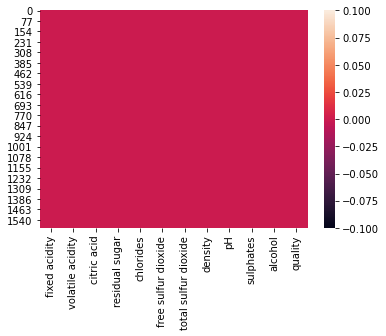

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [6]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df.loc[df['quality'] == 5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


In [8]:
df.pH.max() - df.pH.min()

1.2699999999999996

In [9]:
df['quality'] = df['quality'].astype('float64')

In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [11]:
df.loc[df.sulphates > 0.65,'quality']

1       5.0
9       5.0
11      5.0
13      5.0
14      5.0
       ... 
1593    6.0
1595    6.0
1596    6.0
1597    5.0
1598    6.0
Name: quality, Length: 635, dtype: float64

In [12]:
df[(df.quality > 6.0) & (df.sulphates > 0.65)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7.0
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7.0
128,8.0,0.590,0.16,1.8,0.065,3.0,16.0,0.99620,3.42,0.92,10.50,7.0
198,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.00,7.0
200,9.6,0.320,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.30,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.250,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7.0
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7.0
1549,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8.0
1555,7.0,0.560,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7.0


In [13]:
df[df.quality > 6]['total sulfur dioxide'].std()

32.57223778275728

In [14]:
df[df.quality > 6]['total sulfur dioxide'].var()

1060.9506741764806

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('quality',axis = 1),df['quality'],test_size = 0.2,random_state = 1)

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = lin_reg.predict(x_test)

In [32]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 0.383071981581429
Mean Absolute Error: 0.47482985287630425


In [40]:
from sklearn.svm import SVR
svr = SVR(kernel="rbf" , C=0.1,degree=4)
svr.fit(x_train,y_train)

SVR(C=0.1, cache_size=200, coef0=0.0, degree=4, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
y_pred_svr = svr.predict(x_test)

In [42]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_svr))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_svr))

Mean Squared Error: 0.5348423418310989
Mean Absolute Error: 0.5429459530799244


In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

c:\users\udayg\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred_log = logreg.predict(x_test)

In [49]:
y_pred_log[2]

6.0

In [50]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor(n_estimators = 200,max_depth=9,random_state =1,n_jobs=-1)

In [51]:
random_reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [52]:
y_pred_rand = random_reg.predict(x_test)

In [53]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rand))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rand))

Mean Squared Error: 0.33710742371863683
Mean Absolute Error: 0.4372288785873744
